In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [95]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
df = yf.download("TSLA", start="2020-01-01", end="2024-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [73]:
df.index = pd.to_datetime(df.index)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1257 non-null   float64
 1   (High, TSLA)    1257 non-null   float64
 2   (Low, TSLA)     1257 non-null   float64
 3   (Open, TSLA)    1257 non-null   float64
 4   (Volume, TSLA)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [81]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,213.279443,218.117130,208.204688,213.315219,1.255686e+08
std,83.321515,85.225296,81.382769,83.449250,8.210821e+07
min,24.081333,26.990667,23.367332,24.980000,2.940180e+07
25%,173.860001,177.190002,170.009995,173.889999,7.600980e+07
50%,220.190002,225.339996,215.330002,220.916672,1.019936e+08
75%,259.670013,264.896667,254.210007,259.209991,1.454174e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


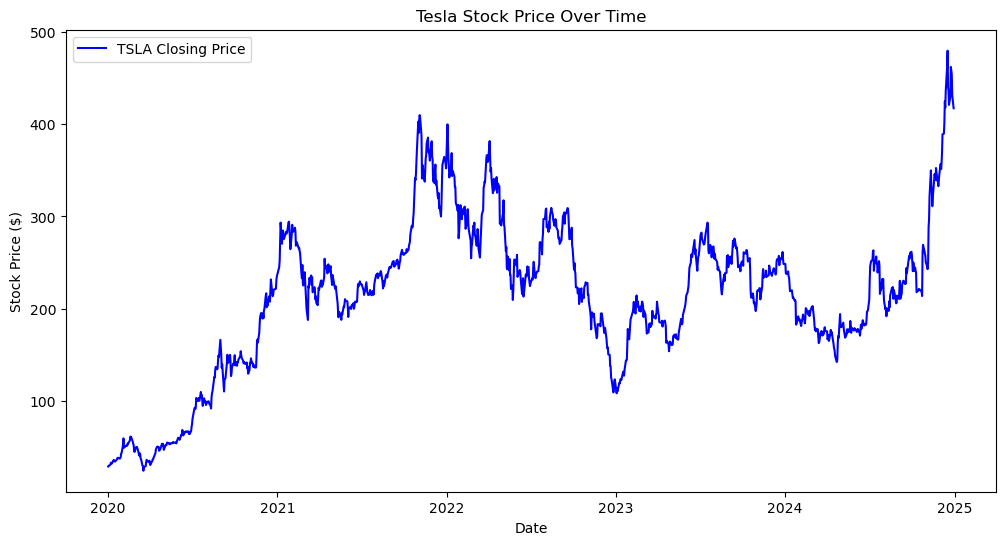

In [83]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="TSLA Closing Price", color='blue')
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

In [85]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["EMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()

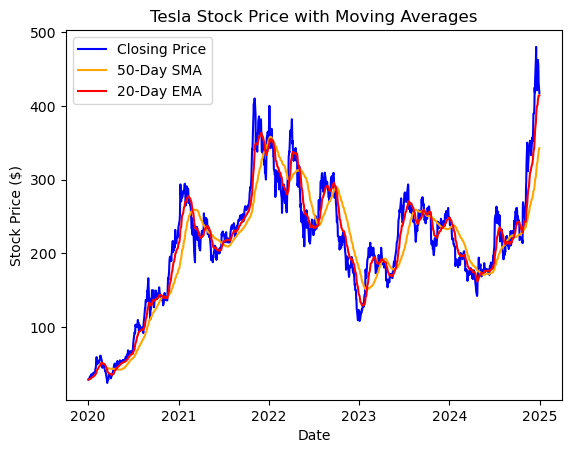

In [87]:
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.plot(df["SMA_50"], label="50-Day SMA", color="orange")
plt.plot(df["EMA_20"], label="20-Day EMA", color="red")
plt.title("Tesla Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

In [89]:
df["Middle Band"] = df["Close"].rolling(window=20).mean()
df["Std Dev"] = df["Close"].rolling(window=20).std()

In [91]:
df["Upper Band"] = df["Middle Band"] + (df["Std Dev"] * 2)
df["Lower Band"] = df["Middle Band"] - (df["Std Dev"] * 2)

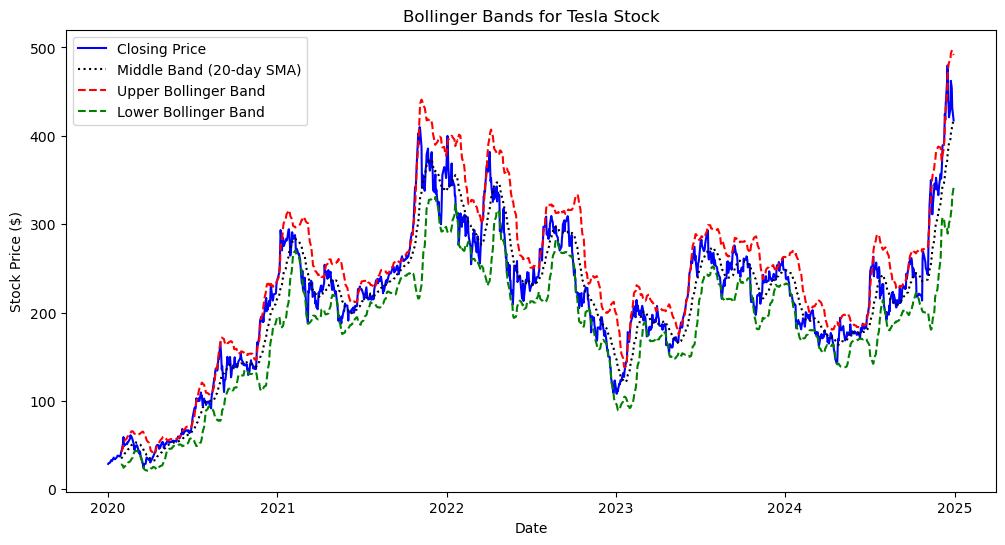

In [93]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.plot(df["Middle Band"], label="Middle Band (20-day SMA)", linestyle="dotted", color="black")
plt.plot(df["Upper Band"], label="Upper Bollinger Band", linestyle="dashed", color="red")
plt.plot(df["Lower Band"], label="Lower Bollinger Band", linestyle="dashed", color="green")

plt.title("Bollinger Bands for Tesla Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

In [99]:
df["Date"] = df.index.factorize()[0] 
X = df[["Date"]]
y = df["Close"]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)
df["Predicted"] = model.predict(X)

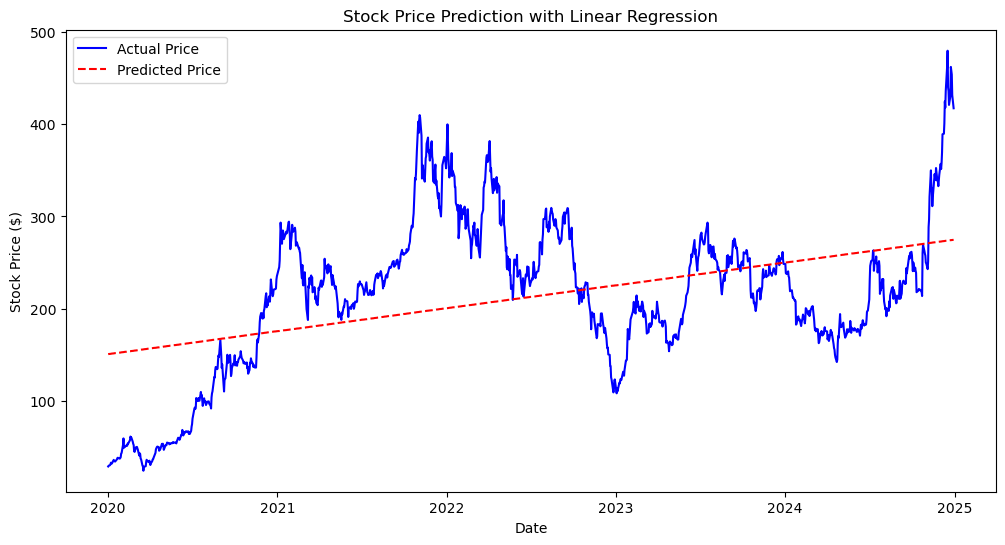

In [109]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="Actual Price", color="blue")
plt.plot(df["Predicted"], label="Predicted Price", linestyle="dashed", color="red")
plt.title("Stock Price Prediction with Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()